In [5]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [7]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [9]:
# Selecting only numeric columns related to sales
data = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']]

# Checking for missing values
data = data.dropna()
data.head()

,QUANTITYORDERED,PRICEEACH,SALES
0,30,95.70,2871.00
1,34,81.35,2765.90
2,41,94.74,3884.34
3,45,83.26,3746.70
4,49,100.00,5205.27


In [11]:
# 📌 Step 4: Normalize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

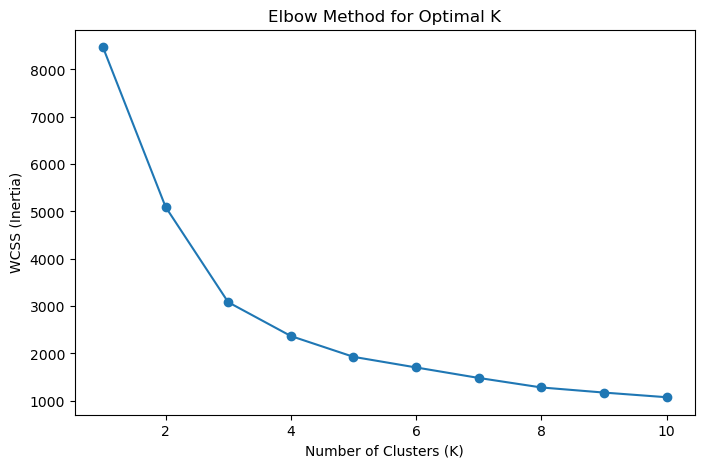

In [13]:
# 📌 Step 5: Determine Optimal Number of Clusters (Elbow Method)
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.show()

# From the elbow plot, look for the “bend” or “elbow” point — usually around K = 3 or 4 for this dataset.

In [17]:
# 📌 Step 6: Apply K-Means Clustering

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_

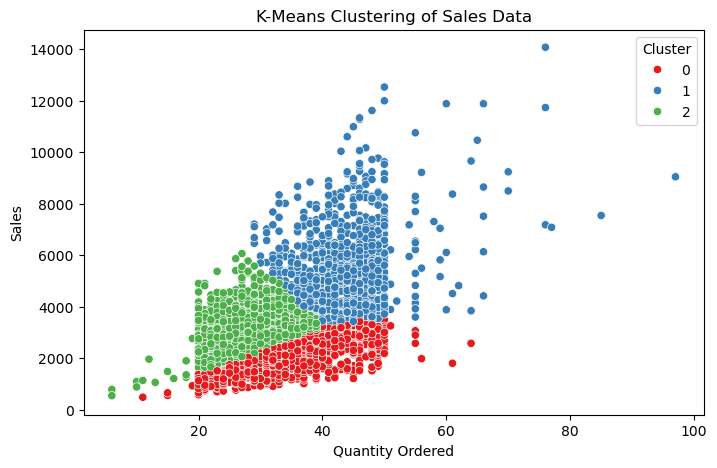

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['QUANTITYORDERED'], y=data['SALES'], hue=data['Cluster'], palette='Set1')
plt.title("K-Means Clustering of Sales Data")
plt.xlabel("Quantity Ordered")
plt.ylabel("Sales")
plt.show()


In [21]:
# 📌 Step 8: Display Cluster Summary
# =========================================
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

         QUANTITYORDERED  PRICEEACH        SALES
Cluster                                         
0              35.125993  57.130216  2009.829955
1              43.847850  96.637795  5584.007299
2              27.392271  94.865575  3089.153662
